## **Importing Data and Exploratory Data Analysis**

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics

In [91]:
DailyGrand = pd.read_csv("/content/drive/MyDrive/A Python Learning/DailyGrand/Final_DailyGrandPrize.csv")
Lotto649 = pd.read_csv("/content/drive/MyDrive/A Python Learning/Lotto649/Final_Lotto649_2012to2024.csv")
LottoMAX = pd.read_csv("/content/drive/MyDrive/A Python Learning/LottoMAX/Final_PrizeBreakdown_2013-23.csv")
LottoMAX_Tickets = pd.read_csv("/content/drive/MyDrive/A Python Learning/LottoMAX/Final_totalticketssold.csv")
Lotto649_jackpot = pd.read_csv("/content/drive/MyDrive/A Python Learning/Lotto649/Lotto649_20220917_JackpotNumbers.csv")

In [92]:
LottoMAX.fillna(value=0,inplace=True)
LottoMAX.isna().sum()

Date                0
Numbers Matched     0
Prize Per Winner    0
All Winners         0
Prize Fund          0
DatePY              0
dtype: int64

In [93]:
LottoMAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7274 non-null   object 
 1   Numbers Matched   7274 non-null   object 
 2   Prize Per Winner  7274 non-null   object 
 3   All Winners       7274 non-null   float64
 4   Prize Fund        7274 non-null   object 
 5   DatePY            7274 non-null   object 
dtypes: float64(1), object(5)
memory usage: 341.1+ KB


# **Number of Winners in each Lottery**

## **LottoMax Number of Winners**

In [94]:
LottoMAX['All Winners'] = LottoMAX['All Winners'].astype(float).astype(int)

In [95]:
LottoMAX

,Date,Numbers Matched,Prize Per Winner,All Winners,Prize Fund,DatePY
0,01-04-2013,Totals,-,901364,"$24,407,128.00",2013-01-04
1,01-04-2013,Match 3,Free Play Ticket,735767,-,2013-01-04
2,01-04-2013,Match 3 plus Bonus,$20.00,77748,"$1,554,960.00",2013-01-04
3,01-04-2013,Match 4,$20.00,84083,"$1,681,660.00",2013-01-04
4,01-04-2013,Match 5,$121.30,3711,"$450,144.30",2013-01-04
...,...,...,...,...,...,...
7269,12-29-2023,Match 6,"$4,041.50",42,"$169,743.00",2023-12-29
7270,12-29-2023,Match 6 plus Bonus,"$169,742.90",0,$0.00,2023-12-29
7271,12-29-2023,Match 7,"$27,000,000.00",0,$0.00,2023-12-29
7272,12-29-2023,Match 3,Free Play Ticket,505659,-,2023-12-29


In [96]:
LottoMAX_rows = LottoMAX[LottoMAX['Numbers Matched'] == 'Totals']
LottoMAX_rows['Date'] = pd.to_datetime(LottoMAX_rows['Date'])
LottoMAX_rows['Year'] = LottoMAX_rows['Date'].dt.year
LottoMAXwinners = LottoMAX_rows.groupby('Year')['All Winners'].sum().reset_index()
LottoMAXwinners.rename(columns={'All Winners': 'LottoMAXwinners'},inplace=True)
LottoMAXwinners

<ipython-input-96-4046a186ddd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LottoMAX_rows['Date'] = pd.to_datetime(LottoMAX_rows['Date'])
<ipython-input-96-4046a186ddd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LottoMAX_rows['Year'] = LottoMAX_rows['Date'].dt.year


,Year,LottoMAXwinners
0,2013,48625279
1,2014,48673609
2,2015,66944849
3,2016,67704508
4,2017,57428823
5,2018,79851510
6,2019,61864421
7,2020,78208370
8,2021,94402821
9,2022,92890436


<Axes: xlabel='Year', ylabel='LottoMAXwinners'>

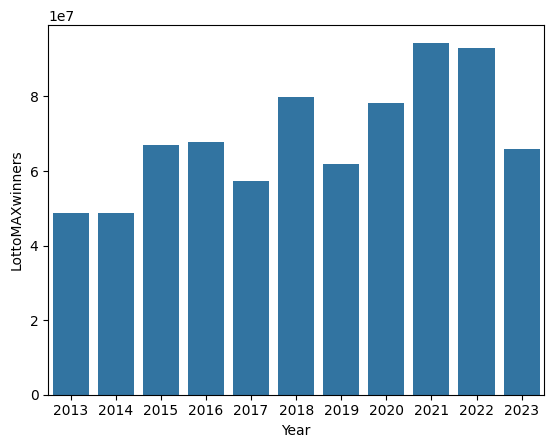

In [97]:
sns.barplot(data=LottoMAXwinners,x='Year',y='LottoMAXwinners')

## **Lotto649 Number of Winners**

In [98]:
Lotto649['Date'] = pd.to_datetime(Lotto649['Date'])
Lotto649['Year'] = Lotto649['Date'].dt.year
mask = Lotto649['Year'] != 2024
Lotto649 = Lotto649[mask]
Lotto649winners = Lotto649.groupby('Year')['Winners'].sum().reset_index()
Lotto649winners.rename(columns={'Winners': 'Lotto649winners'},inplace=True)
Lotto649winners

,Year,Lotto649winners
0,2012,23082065
1,2013,47116494
2,2014,86438281
3,2015,97197683
4,2016,83446358
5,2017,81055839
6,2018,83673406
7,2019,76628308
8,2020,68828105
9,2021,73830013


## **Daily Grand Number of Winners**

In [99]:
DailyGrand.head()

,Date,Draw,Winners,Prize
0,2016-10-20,5/5 + 1/1,0,"$7,000,000.00"
1,2016-10-20,5/5 + 0/1,1,"$25,000.00 a Year for Life or $500,000.00"
2,2016-10-20,4/5 + 1/1,8,"$1,000.00"
3,2016-10-20,4/5 + 0/1,77,$500.00
4,2016-10-20,3/5 + 1/1,597,$100.00


In [100]:
DailyGrand['Date'] = pd.to_datetime(DailyGrand['Date'])
DailyGrand['Year'] = DailyGrand['Date'].dt.year
mask = (DailyGrand['Year'] != 2016) & (DailyGrand['Year'] != 2024)
DailyGrand = DailyGrand[mask]
DailyGrandWinners = DailyGrand.groupby('Year')['Winners'].sum().reset_index()
DailyGrandWinners.rename(columns={'Winners': 'DailyGrandWinners'},inplace=True)
DailyGrandWinners

,Year,DailyGrandWinners
0,2017,14079412
1,2018,15134845
2,2019,13449231
3,2020,9306989
4,2021,10154278
5,2022,10285216
6,2023,10633925


**Visualizations**

In [101]:
merged = pd.merge(LottoMAXwinners, Lotto649winners, on='Year')
final_merged = pd.merge(merged, DailyGrandWinners, on='Year')
final_merged

,Year,LottoMAXwinners,Lotto649winners,DailyGrandWinners
0,2017,57428823,81055839,14079412
1,2018,79851510,83673406,15134845
2,2019,61864421,76628308,13449231
3,2020,78208370,68828105,9306989
4,2021,94402821,73830013,10154278
5,2022,92890436,73278384,10285216
6,2023,65915089,87527136,10633925


In [102]:
tickets = final_merged.copy()
tickets['LottoMAX'] = tickets['LottoMAXwinners']/(1/7)
tickets['Lotto649'] = tickets['Lotto649winners']/(1/6.6)
tickets['DailyGrand'] = tickets['DailyGrandWinners']/(1/6.8)


## **Total Ticket Demand**

In [103]:
tickets = tickets.drop(columns=['LottoMAXwinners','Lotto649winners','DailyGrandWinners'])
tickets.head()

,Year,LottoMAX,Lotto649,DailyGrand
0,2017,402001761.0,534968537.4,95740001.6
1,2018,558960570.0,552244479.6,102916946.0
2,2019,433050947.0,505746832.8,91454770.8
3,2020,547458590.0,454265493.0,63287525.2
4,2021,660819747.0,487278085.8,69049090.4


In [104]:
tickets.to_csv('/content/drive/MyDrive/A Python Learning/TicketSalesYearly.csv',index=False)

<Axes: xlabel='Year', ylabel='Winners'>

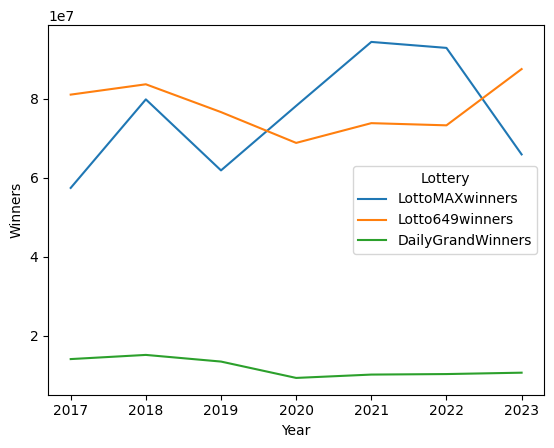

In [105]:
melted_data = final_merged.melt('Year', var_name='Lottery', value_name='Winners')
sns.lineplot(x='Year', y='Winners', hue='Lottery', data=melted_data)

<Axes: xlabel='Year', ylabel='Total Tickets Sold'>

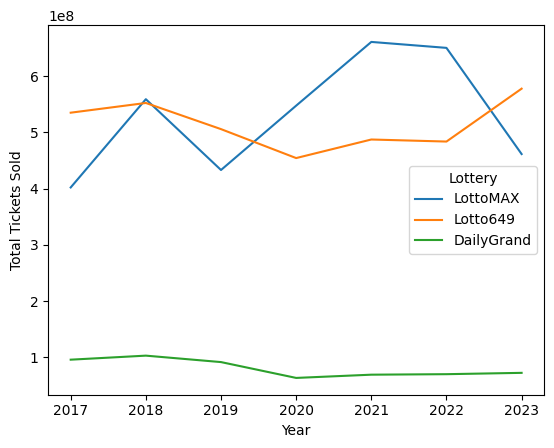

In [106]:
melted_data = tickets.melt('Year', var_name='Lottery', value_name='Total Tickets Sold')
sns.lineplot(x='Year', y='Total Tickets Sold', hue='Lottery', data=melted_data)

# **Calculating Expected Value**

## **DailyGrand Expected Value**
Daily Grand Expected Value is much simpler than the other lotteries because the prize pool stays consistent, without change in the value of the jackpot. It is always a thousand dollars per day for life (or 7 million).

In [107]:
from itertools import cycle
sequence = [1/13348188, 1/2224698, 1/60674, 1/10112, 1/1411, 1/235.2, 1/100.8, 1/19.7, 1/12.3]
num_repetitions = len(DailyGrand) // len(sequence)
repeated_sequence = cycle(sequence)
repeated_values = [next(repeated_sequence) for _ in range(num_repetitions * len(sequence))]
DailyGrand['Probability'] = repeated_values

In [108]:
DailyGrand['Prize'] = DailyGrand['Prize'].replace("FREE PLAY", "$3.00")


In [109]:
DailyGrand.head(10)

,Date,Draw,Winners,Prize,Year,Probability
189,2017-01-02,5/5 + 1/1,0,"$7,000,000.00",2017,7.491654e-08
190,2017-01-02,5/5 + 0/1,0,"$500,000.00",2017,4.494992e-07
191,2017-01-02,4/5 + 1/1,11,"$1,000.00",2017,1.648152e-05
192,2017-01-02,4/5 + 0/1,63,$500.00,2017,9.889241e-05
193,2017-01-02,3/5 + 1/1,457,$100.00,2017,7.087172e-04
194,2017-01-02,3/5 + 0/1,2862,$20.00,2017,4.251701e-03
195,2017-01-02,2/5 + 1/1,6943,$10.00,2017,9.920635e-03
196,2017-01-02,1/5 + 1/1,37116,$4.00,2017,5.076142e-02
197,2017-01-02,0/5 + 1/1,61223,$3.00,2017,8.130081e-02
198,2017-01-05,5/5 + 1/1,0,"$7,000,000.00",2017,7.491654e-08


In [110]:
TailyGrand = DailyGrand.copy()
TailyGrand = TailyGrand.drop_duplicates()
TailyGrand['Prize'] = TailyGrand['Prize'].str.extract(r'\$([0-9,]+\.[0-9]{2})', expand=False)
TailyGrand['Prize'] = TailyGrand['Prize'].replace("25,000.00", "500,000.00")
TailyGrand['Prize'] = TailyGrand['Prize'].str.replace(r'[,]', '')

<ipython-input-110-cc26859cd98f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  TailyGrand['Prize'] = TailyGrand['Prize'].str.replace(r'[,]', '')


In [111]:
TailyGrand.loc[TailyGrand['Draw'] == '5/5 + 1/1', 'Prize'] = 7000000.0
TailyGrand.loc[TailyGrand['Draw'] == '5/5 + 0/1', 'Prize'] = 500000.0
TailyGrand.loc[TailyGrand['Draw'] == '0/5 + 1/1', 'Prize'] = 3.0

In [112]:
TailyGrand['Prize'] = TailyGrand['Prize'].astype(float)

In [113]:
expected_value = TailyGrand.groupby('Date').apply(lambda x: (x['Prize'] * x['Probability']).sum())
print("Expected Value of Daily Grand:", expected_value[1])
TailyGrand['Expected Value'] = 1.5171532909193532

Expected Value of Daily Grand: 1.5171532909193532


In [114]:
TailyGrand['Year']=pd.to_datetime(TailyGrand['Date']).dt.year

In [115]:
TailyGrand.head()

,Date,Draw,Winners,Prize,Year,Probability,Expected Value
189,2017-01-02,5/5 + 1/1,0,7000000.0,2017,7.491654e-08,1.517153
190,2017-01-02,5/5 + 0/1,0,500000.0,2017,4.494992e-07,1.517153
191,2017-01-02,4/5 + 1/1,11,1000.0,2017,1.648152e-05,1.517153
192,2017-01-02,4/5 + 0/1,63,500.0,2017,9.889241e-05,1.517153
193,2017-01-02,3/5 + 1/1,457,100.0,2017,7.087172e-04,1.517153


In [116]:
TailyGrand.to_csv('/content/drive/MyDrive/A Python Learning/ExpectedValueDailyGrand.csv',index=False)

## **Expected Value of "1000 per Day" at different life expectancies**

Calculating the maximum expected value, we have to see the "Thousand Dollar per Day" for different life expectancies, I put 10 to 80 years of staying alive to see the present value of the lottery. Ultimately, it is a better deal to accept 7 million at a ~4% discount rate, even if an individual lived 80 years, they would have a future value of ~6million.

In [117]:
DailyGrandLotteryJackpotLTvalue = {
    'Years': [10, 20, 30, 40, 50, 60, 70, 80],
    'Days': [3650, 7300, 10950, 14600, 18250, 21900, 25550, 29200],
    'Future Value': [3650000, 7300000, 10950000, 14600000, 18250000, 21900000, 25550000, 29200000],
    'Present Value': [1831464, 2497804, 3155369, 3802391, 4436074, 5054578, 5656014, 6238458]
}

DailyGrandLotteryJackpotLTvaluedf = pd.DataFrame(DailyGrandLotteryJackpotLTvalue)
DailyGrandLotteryJackpotLTvaluedf.head(10)

,Years,Days,Future Value,Present Value
0,10,3650,3650000,1831464
1,20,7300,7300000,2497804
2,30,10950,10950000,3155369
3,40,14600,14600000,3802391
4,50,18250,18250000,4436074
5,60,21900,21900000,5054578
6,70,25550,25550000,5656014
7,80,29200,29200000,6238458


In [118]:
DailyGrandLotteryJackpotLTvaluedf.to_csv('/content/drive/MyDrive/A Python Learning/DailyGrandPVFV.csv',index=False)

Number of Lotteries per year

In [119]:
grouped_data = TailyGrand[TailyGrand['Prize'] == 7000000.0].groupby(TailyGrand['Year']).size()
grouped_data

Year
2017    104
2018    105
2019    104
2020    105
2021    104
2022    104
2023    104
dtype: int64

Prizepayout per year for dailygrand

In [120]:
prizepayout = TailyGrand.groupby(pd.to_datetime(TailyGrand['Date']).dt.year).apply(lambda x: (x['Prize'] * x['Winners']).sum())
prizepayout = pd.DataFrame(prizepayout, columns=['prize']).reset_index()
prizepayout.columns = ['date', 'prize']
prizepayout


,date,prize
0,2017,121679078.0
1,2018,136901567.0
2,2019,127477115.0
3,2020,107273823.0
4,2021,176701272.0
5,2022,113294147.0
6,2023,110552526.0


<Axes: xlabel='date', ylabel='prize'>

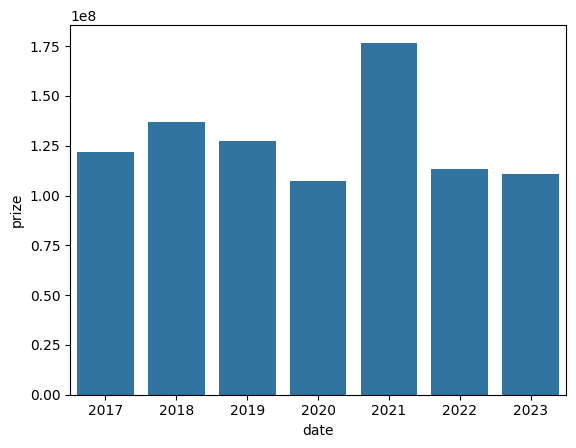

In [121]:
sns.barplot(data=prizepayout,x='date',y='prize')

In [122]:
filtered_data = TailyGrand[(TailyGrand['Draw'] == '5/5 + 1/1') & (TailyGrand['Winners'] > 0)]
filtered_data.groupby('Year')

## **Expected Value for LottoMax**

In [123]:
LottoMAX.loc[LottoMAX['Numbers Matched'] == 'Match 3', 'Prize Per Winner'] = '$5.00'
LottoMAX.loc[LottoMAX['Numbers Matched'] == 'Totals', 'Prize Per Winner'] = '0.0'
LottoMAX['Prize Per Winner'] = LottoMAX['Prize Per Winner'].str.extract(r'\$([0-9,]+\.[0-9]{2})', expand=False)
LottoMAX['Prize Per Winner'] = LottoMAX['Prize Per Winner'].str.replace(r'[,]', '')

<ipython-input-123-f3a20214a07e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  LottoMAX['Prize Per Winner'] = LottoMAX['Prize Per Winner'].str.replace(r'[,]', '')


In [124]:
LottoMAX['Prize Per Winner'] = LottoMAX['Prize Per Winner'].astype(float)

In [125]:
LottoMAX1 = LottoMAX.copy()

In [126]:
LottoMAX = LottoMAX.dropna()

**Using 2019 to 2023, as the lottery was altered to include Match 5 plus Bonus and Match 4 plus Bonus in 2019.**

In [127]:
LottoMAX['Date'] = pd.to_datetime(LottoMAX['Date'])
mask = (LottoMAX['Date'].dt.year >= 2019) & (LottoMAX['Date'].dt.year <= 2023)
LottoMAX = LottoMAX[mask]

<ipython-input-127-1399f95fd593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LottoMAX['Date'] = pd.to_datetime(LottoMAX['Date'])


In [128]:
LottoMAX.head()

,Date,Numbers Matched,Prize Per Winner,All Winners,Prize Fund,DatePY
2432,2019-01-04,Match 7,10000000.0,0,$0.00,2019-01-04
2433,2019-01-04,Match 6 plus Bonus,78329.2,4,"$313,316.80",2019-01-04
2434,2019-01-04,Match 6,4973.3,67,"$333,211.10",2019-01-04
2436,2019-01-04,Match 4,20.0,88132,"$1,762,640.00",2019-01-04
2437,2019-01-04,Match 3 plus Bonus,20.0,84820,"$1,696,400.00",2019-01-04


Building the dataframe

In [129]:
prizes = [0,10000000,20000000,30000000,40000000,50000000,60000000]
LottoMAX_combined_df = pd.DataFrame()
dfs =[]
for prize in prizes:
  matching_rows = LottoMAX[(LottoMAX['Prize Per Winner'] >= prize) & (LottoMAX['Prize Per Winner'] < (prize+10000000))]
  dates = matching_rows['Date'].unique()
  Higherpower = ['Match 6 plus Bonus','Match 6','Match 5 plus Bonus','Match 5','Match 4 plus Bonus']
  b=[]
  for power in Higherpower:
    a=[]
    f = []
    g=[]
    h = []
    for date in dates:
      cc = LottoMAX[(LottoMAX['Date'] == date) & (LottoMAX['Numbers Matched'] == power)]
      mean_prize = cc['Prize Per Winner'].mean()
      if pd.notnull(mean_prize):
        a.append(mean_prize)
        mean = statistics.mean(a)
    b.append(mean)
  c= int(b[0])
  d = int(b[1])
  e = int(b[2])
  k = int(b[3])
  l = int(b[4])
  df = pd.DataFrame({'Jackpot': [prize+5000000],'Match 6 plus Bonus': [c], 'Match 6': [d], 'Match 5 plus Bonus': [e],'Match 5':[k],'Match 4 plus Bonus':[l],'Match 4':[20],'Match 3 plus Bonus':[20],'Match 3':[5]})
  dfs.append(df)
LottoMAX_combined_df = pd.concat(dfs, ignore_index=True)
LottoMAX_combined_df.head(10)

,Jackpot,Match 6 plus Bonus,Match 6,Match 5 plus Bonus,Match 5,Match 4 plus Bonus,Match 4,Match 3 plus Bonus,Match 3
0,5000000,219973,4817,928,105,49,20,20,5
1,15000000,143772,4818,913,105,49,20,20,5
2,25000000,164435,5003,953,106,50,20,20,5
3,35000000,200671,4747,945,106,50,20,20,5
4,45000000,166388,4662,934,104,49,20,20,5
5,55000000,259897,4771,913,105,49,20,20,5
6,65000000,305529,4909,917,105,49,20,20,5


In [130]:
prizes = [0,10000000,20000000,30000000,40000000,50000000,60000000]
f=[]
g=[]
h=[]
dfs=[]
for prize in prizes:
  matching_rows = LottoMAX1[(LottoMAX1['Prize Per Winner'] >= prize) & (LottoMAX1['Prize Per Winner'] < (prize+10000000))]
  dates = matching_rows['Date'].unique()
  f=[]
  h=[]
  for date in dates:
    cc = LottoMAX1[(LottoMAX1['Date'] == date) & (LottoMAX1['Numbers Matched'] == 'Totals')]
    f.append(cc['All Winners'].mean())
  print(date, f)
  fsum = sum(f)
  count=len(f)
  df = pd.DataFrame({'Jackpot': [prize+5000000],'Tickets Sold':[int((fsum/count)/(1/7))]})
  dfs.append(df)
pepe = pd.concat(dfs, ignore_index=True)
pepe.head(10)

12-29-2023 [901364.0, 791561.0, 879680.0, 961459.0, 808557.0, 828353.0, 956935.0, 758292.0, 823256.0, 943206.0, 754033.0, 839339.0, 955084.0, 1080501.0, 744018.0, 823300.0, 912383.0, 1087445.0, 736964.0, 808519.0, 862941.0, 1428318.0, 800886.0, 847722.0, 948151.0, 1078946.0, 1304445.0, 773722.0, 784797.0, 865417.0, 944677.0, 723010.0, 756940.0, 804323.0, 909087.0, 703167.0, 728822.0, 841767.0, 1225442.0, 1405738.0, 1519436.0, 944217.0, 945494.0, 1165794.0, 1308248.0, 1445736.0, 1703779.0, 2263592.0, 1196416.0, 1091637.0, 1255352.0, 1383441.0, 902756.0, 951513.0, 1000150.0, 1269661.0, 1281143.0, 1530577.0, 1654037.0, 2093213.0, 1253695.0, 1248061.0, 841968.0, 835878.0, 858415.0, 932541.0, 1246794.0, 1303753.0, 835771.0, 820180.0, 911469.0, 934506.0, 780135.0, 760687.0, 833147.0, 879486.0, 736286.0, 737132.0, 794240.0, 757691.0, 753579.0, 809514.0, 886019.0, 1255346.0, 1344179.0, 895307.0, 953055.0, 707433.0, 735025.0, 710282.0, 777011.0, 801957.0, 856718.0, 1255787.0, 742387.0, 724516.0

,Jackpot,Tickets Sold
0,5000000,6739353
1,15000000,4810872
2,25000000,5014211
3,35000000,6191832
4,45000000,5924889
5,55000000,8064934
6,65000000,10860820


In [131]:
merged_dfs = pd.merge(LottoMAX_combined_df, pepe, on='Jackpot')

In [132]:
merged_dfs['Jackpot Amount'] = ['1-10m','10-20m','20-30m','30-40m','40-50m','50-60m','60-68m']
merged_dfs['MaxMillions'] = [0,0,0,0,0,4,8]
column_to_move = merged_dfs.pop('Jackpot Amount')
merged_dfs.insert(0, 'Jackpot Amount', column_to_move)

In [133]:
merged_dfs

,Jackpot Amount,Jackpot,Match 6 plus Bonus,Match 6,Match 5 plus Bonus,Match 5,Match 4 plus Bonus,Match 4,Match 3 plus Bonus,Match 3,Tickets Sold,MaxMillions
0,1-10m,5000000,219973,4817,928,105,49,20,20,5,6739353,0
1,10-20m,15000000,143772,4818,913,105,49,20,20,5,4810872,0
2,20-30m,25000000,164435,5003,953,106,50,20,20,5,5014211,0
3,30-40m,35000000,200671,4747,945,106,50,20,20,5,6191832,0
4,40-50m,45000000,166388,4662,934,104,49,20,20,5,5924889,0
5,50-60m,55000000,259897,4771,913,105,49,20,20,5,8064934,4
6,60-68m,65000000,305529,4909,917,105,49,20,20,5,10860820,8


In [134]:
# Expected Value for draws
merged_dfs['Expected Value'] = (merged_dfs['Jackpot'] * (1/33294800) +
                               merged_dfs['Match 6 plus Bonus'] * (1/4756400)+
                               merged_dfs['Match 6'] * (1/113248)+
                               merged_dfs['Match 5 plus Bonus'] * (1/37749)+
                               merged_dfs['Match 5'] * (1/1841)+
                               merged_dfs['Match 4 plus Bonus'] * (1/1105)+
                               merged_dfs['Match 4'] * (1/82.9)+
                               merged_dfs['Match 3 plus Bonus'] * (1/82.9)+
                               merged_dfs['Match 3'] * (1/8.5)+
                               merged_dfs['MaxMillions']*(1/33294800))

In [135]:
merged_dfs.head(10)

,Jackpot Amount,Jackpot,Match 6 plus Bonus,Match 6,Match 5 plus Bonus,Match 5,Match 4 plus Bonus,Match 4,Match 3 plus Bonus,Match 3,Tickets Sold,MaxMillions,Expected Value
0,1-10m,5000000,219973,4817,928,105,49,20,20,5,6739353,0,1.435662
1,10-20m,15000000,143772,4818,913,105,49,20,20,5,4810872,0,1.719600
2,20-30m,25000000,164435,5003,953,106,50,20,20,5,5014211,0,2.028433
3,30-40m,35000000,200671,4747,945,106,50,20,20,5,6191832,0,2.333926
4,40-50m,45000000,166388,4662,934,104,49,20,20,5,5924889,0,2.624032
5,50-60m,55000000,259897,4771,913,105,49,20,20,5,8064934,4,2.944989
6,60-68m,65000000,305529,4909,917,105,49,20,20,5,10860820,8,3.256254


In [136]:
merged_dfs.to_csv('/content/drive/MyDrive/A Python Learning/ExpectedValueLottoMAX.csv',index=False)

## **Expected Value for Lotto649**

Lotto649 is tricky because the prize amounts vary based on a percentage of the prize payout (48% of Lotto649 Sales). Therefore, rather than having inconsistency in percentage-based approach, I opted for an average of the prize amount for each Jackpot amount from 2012 to 2023, therefore this includes lower Jackpot amounts of 4 million in the past.

In [137]:
Lotto649_jackpot['Date'] = pd.to_datetime(Lotto649_jackpot['Date'])

In [138]:
Lotto649_merged = pd.merge(Lotto649,Lotto649_jackpot, on='Date', how='outer')

In [139]:
Lotto649_merged.dropna(subset=['Prize'], inplace=True)

In [140]:
Lotto649_merged

,Date,Draw,Prize,Winners,Year,Jackpot
0,2012-01-04,Match 6,3052345.0,0.0,2012.0,NaN
1,2012-01-04,Match 5 plus Bonus,72674.0,3.0,2012.0,NaN
2,2012-01-04,Match 5,1765.0,102.0,2012.0,NaN
3,2012-01-04,Match 4,50.0,6787.0,2012.0,NaN
4,2012-01-04,Match 3,10.0,110913.0,2012.0,NaN
...,...,...,...,...,...,...
10011,2023-12-30,Match 4,61.0,5572.0,2023.0,20000000.0
10012,2023-12-30,Match 3,10.0,98098.0,2023.0,20000000.0
10013,2023-12-30,Match 2 plus Bonus,5.0,60853.0,2023.0,20000000.0
10014,2023-12-30,Match 2,0.0,657477.0,2023.0,20000000.0


Test

In [141]:
prize = 20000000
matching_rows = Lotto649_merged[((Lotto649_merged['Prize'] > prize) & (Lotto649_merged['Prize'] < (prize+10000000)))| ((Lotto649_merged['Jackpot'] > prize)& (Lotto649_merged['Jackpot']< (prize+10000000)))]
dates = matching_rows['Date'].unique()
Higherpower = ['Match 5 plus Bonus','Match 5','Match 4']
a=[]
f=[]
g =[]
h=[]
for power in Higherpower:
  f = []
  for date in dates:
    cc = Lotto649_merged[(Lotto649_merged['Date'] == date) & (Lotto649_merged['Draw'] == power)]
    a.append(cc['Prize'].mean())
    f.append(cc['Winners'].mean())
  count = len(f)
  fsum = sum(f)
  g.append(fsum)
  gsum = sum(g)
  print(gsum)
hsum = (gsum/(1/6.6))/count
print(hsum)


249.0
11516.0
617415.0
41161.0


Creating a pandas dataframe on average Lottery Prize Amounts at different prize levels.

In [142]:
prizes = [0,10000000,20000000,30000000,40000000,50000000,60000000]
combined_df = pd.DataFrame()
dfs =[]
for prize in prizes:
  matching_rows = Lotto649_merged[((Lotto649_merged['Prize'] >= prize) & (Lotto649_merged['Prize'] < (prize+10000000)))| ((Lotto649_merged['Jackpot'] >= prize)& (Lotto649_merged['Jackpot']< (prize+10000000)))]
  dates = matching_rows['Date'].unique()
  Higherpower = ['Match 5 plus Bonus','Match 5','Match 4']
  b=[]
  for power in Higherpower:
    a=[]
    f = []
    g=[]
    h = []
    for date in dates:
      cc = Lotto649_merged[(Lotto649_merged['Date'] == date) & (Lotto649_merged['Draw'] == power)]
      a.append(cc['Prize'].mean())
      f.append(cc['Winners'].mean())
          # Create a new DataFrame for the current date and 'Prize' values
      mean = statistics.mean(a)
    b.append(mean)
  print(len(a))
  c= int(b[0])
  d = int(b[1])
  e = int(b[2])
  df = pd.DataFrame({'Match 6': [prize+5000000],'Match 5 plus Bonus': [c], 'Match 5': [d], 'Match 4': [e],'Match 3':[10],'Match 2 plus Bonus':[5],'Match 2':[3]})
  dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head(10)

1252
311
116
55
29
12
9


,Match 6,Match 5 plus Bonus,Match 5,Match 4,Match 3,Match 2 plus Bonus,Match 2
0,5000000,147174,2172,77,10,5,3
1,15000000,152384,2171,78,10,5,3
2,25000000,147930,1951,77,10,5,3
3,35000000,162689,1682,82,10,5,3
4,45000000,152723,1225,69,10,5,3
5,55000000,111364,1062,70,10,5,3
6,65000000,161118,1094,78,10,5,3


Calculating Total tickets sold per Jackpot Value

In [143]:
prizes = [0,10000000,20000000,30000000,40000000,50000000,60000000]
f=[]
g=[]
h=[]
dfs=[]
for prize in prizes:
  matching_rows = Lotto649_merged[((Lotto649_merged['Prize'] > prize) & (Lotto649_merged['Prize'] < (prize+10000000)))| ((Lotto649_merged['Jackpot'] > prize)& (Lotto649_merged['Jackpot']< (prize+10000000)))]
  dates = matching_rows['Date'].unique()
  f=[]
  h=[]
  for date in dates:
    cc = Lotto649_merged[(Lotto649_merged['Date'] == date) & (Lotto649_merged['Draw'] == 'Match 2')]
    f.append(cc['Winners'].mean())
  print(date, f)
  fsum = sum(f)
  count=len(f)
  df = pd.DataFrame({'Gold Jackpot': [prize+5000000],'Tickets Sold':[int((fsum/count)/(1/8.3))]})
  dfs.append(df)
pepe = pd.concat(dfs, ignore_index=True)
pepe.head(10)

2023-12-30T00:00:00.000000000 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 624805.0, 826984.0, 767316.0, 895480.0, 879588.0, 1027200.0, 1031885.0, 1330496

,Gold Jackpot,Tickets Sold
0,5000000,4436560
1,15000000,4400234
2,25000000,5309584
3,35000000,5344866
4,45000000,5755326
5,55000000,6881200
6,65000000,10827314


In [144]:
combined_df['Match 6 5mil'] = combined_df['Match 6']

In [145]:
combined_df['Match 6 5mil'] = 5000000
column_to_move = combined_df.pop('Match 6 5mil')
combined_df.insert(1, 'Match 6 5mil', column_to_move)


combined_df = combined_df.rename(columns={'Match 6' : 'Gold Jackpot'})

In [146]:
merged_df = pd.merge(combined_df, pepe, on='Gold Jackpot')

In [147]:
merged_df['Gold Jackpot Amount'] = ['1-10m','10-20','20-30m','30-40m','40-50m','50-60m','60-68m']
merged_df['Balls'] = [30,27.5,22.5,17.5,12.5,7.5,2.5]

In [148]:
# Expected Value for draws
merged_df['Expected Value'] = ((merged_df['Gold Jackpot'] * (1/merged_df['Tickets Sold'])*(1/merged_df['Balls']))+
                               merged_df['Match 6 5mil'] * (1/13983816 )+
                               merged_df['Match 5 plus Bonus'] * (1/2330636 )+
                               merged_df['Match 5'] * (1/55492)+
                               merged_df['Match 4'] * (1/1033)+
                               merged_df['Match 3'] * (1/56.7 )+
                               merged_df['Match 2 plus Bonus'] * (1/81.2 )+
                               merged_df['Match 2'] * (1/8.3)+
                               1000000*(1/merged_df['Tickets Sold']))
print((merged_df['Gold Jackpot'] * (1/merged_df['Tickets Sold'])*(1/merged_df['Balls'])))

0    0.037567
1    0.123960
2    0.209265
3    0.374191
4    0.625508
5    1.065706
6    2.401334
dtype: float64


In [149]:
column_to_move = merged_df.pop('Gold Jackpot Amount')
merged_df.insert(0, 'Gold Jackpot Amount', column_to_move)

Final Result for Lotto649 Expected Value

In [150]:
merged_df

,Gold Jackpot Amount,Gold Jackpot,Match 6 5mil,Match 5 plus Bonus,Match 5,Match 4,Match 3,Match 2 plus Bonus,Match 2,Tickets Sold,Balls,Expected Value
0,1-10m,5000000,5000000,147174,2172,77,10,5,3,4436560,30.0,1.396740
1,10-20,15000000,5000000,152384,2171,78,10,5,3,4400234,27.5,1.488180
2,20-30m,25000000,5000000,147930,1951,77,10,5,3,5309584,22.5,1.527719
3,30-40m,35000000,5000000,162689,1682,82,10,5,3,5344866,17.5,1.697727
4,40-50m,45000000,5000000,152723,1225,69,10,5,3,5755326,12.5,1.910604
5,50-60m,55000000,5000000,111364,1062,70,10,5,3,6881200,7.5,2.302659
6,60-68m,65000000,5000000,161118,1094,78,10,5,3,10827314,2.5,3.614992


In [151]:
merged_df.to_csv('/content/drive/MyDrive/A Python Learning/ExpectedValueLotto649.csv',index=False)

Total Tickets Sold

In [152]:
tickets.head()

,Year,LottoMAX,Lotto649,DailyGrand
0,2017,402001761.0,534968537.4,95740001.6
1,2018,558960570.0,552244479.6,102916946.0
2,2019,433050947.0,505746832.8,91454770.8
3,2020,547458590.0,454265493.0,63287525.2
4,2021,660819747.0,487278085.8,69049090.4
